#### Analysis Of Attrition Rate at the Company
#### Roll No - D22009 
#### Name -ARNAB MANDAL

#<font color='#006400'>**Problem Statement:**</font>

A company need to keep a check on Employee Attrition rate and work towards reducing the Attriion rate 

###<font color='#006400'>**Brief Overview of the Notebook**</font>
* Missing and Duplicacy check
* Exploratory Data Analysis
* Model Building and finding the best model
* Residual analysis
* Summary : Insights & Recommendations



In [1]:
# imort datase
import pandas as pd
 
data = pd.read_csv(r"C:\Users\arnab\Downloads\attrition - attrition.csv")
data

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2


In [2]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

#### Missing and Duplicacy check

In [3]:
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
DistanceFromHome           0
dtype: int64

# Exploratory Data Analysis

#### Identification of variables and data types:

In [4]:
data.shape

(1470, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  OverTime                 1470 non-null   object
 13  TotalWorkingYears        1470 non-null   int64 
 14  WorkLifeBalance          1470 non-null  

#### Analysing basic metrics

In [6]:
data.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


1 The Attrition CSV dataset consist of 20 variables in which there are 6 Categorical Variables , 6 Discrete variables and 8 Continueous variables

2 The count of all the variables are 1470 and there are zero null values in the dataset

3 Above analysis shows that the these variables Age,Monthly salary,Total working years,Years at company and Distance from home were ditributed lot. i.e the standard deviation for these variables is more.

4 The min values of variables (Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome) are as follows
(18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000)

5 The Quntile 1(Q1)/ the variable values which fall under 25% of total values of all the variables (Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome) are as follows
(30.000000,0.000000,2.000000,2.000000,1.000000,       2.000000,2911.000000,6.000000,2.000000,3.000000,      2.000000,0.000000,2.000000,2.000000)

6 The Median / the variable values which fall under 50% of total values of all the variables (Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome) are as follows
(36.000000,0.000000,3.000000,3.000000,2.000000,        3.000000,4919.000000,10.000000,3.000000,5.000000,     3.000000,1.000000,3.000000,7.000000)

7 The Quntile 3(Q3)/ the variable values which fall under 70% of total values of all the variables (Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome) are as follows
(43.000000,0.000000,4.000000,3.000000,3.000000,       4.000000,8379.000000,15.000000,3.000000,9.000000,     7.000000,3.000000,7.000000,14.000000)

8 The min values of variables (Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome) are as follows
(60.000000,1.000000,4.000000,4.000000,5.000000,       4.000000,19999.000000,40.000000,4.000000,40.000000,   18.000000,15.000000,17.000000,29.000000)


### 1 Univariet Analysis

In [7]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
Cont_var = ['Age','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
      'YearsSinceLastPromotion','DistanceFromHome','YearsWithCurrManager']

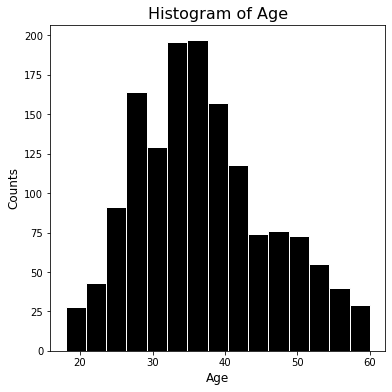

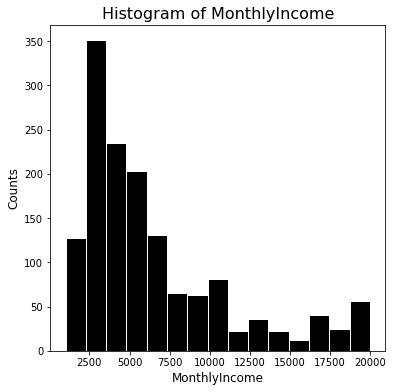

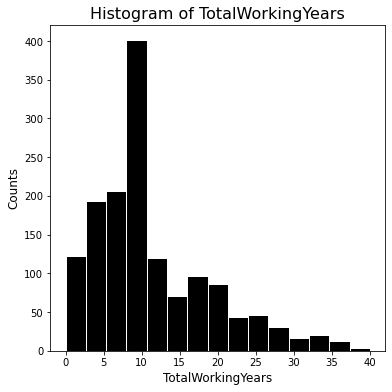

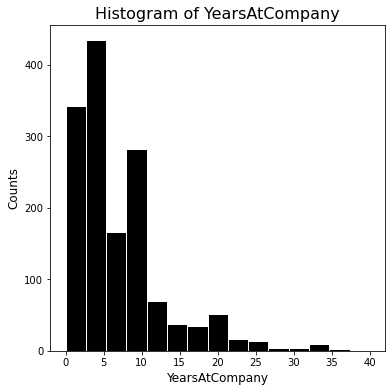

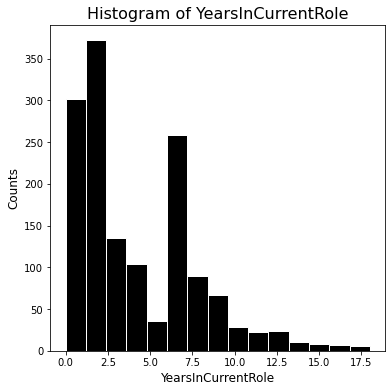

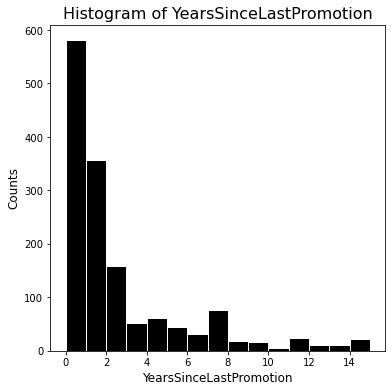

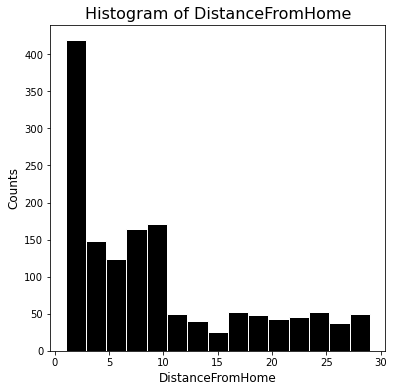

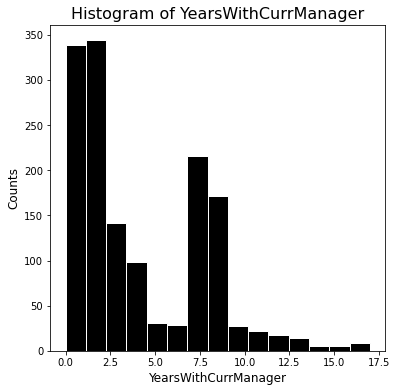

In [9]:
for i in Cont_var:
    data.hist(column=i,grid=False,figsize=(6,6),color= 'black',edgecolor='white',bins=15)
    plt.xlabel(i,fontsize = 12)

    plt.ylabel('Counts',fontsize = 12)
    plt.title( f'Histogram of {i}',fontsize = 16)
    plt.show()

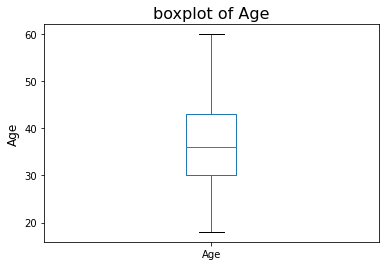

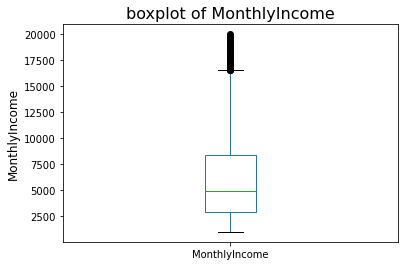

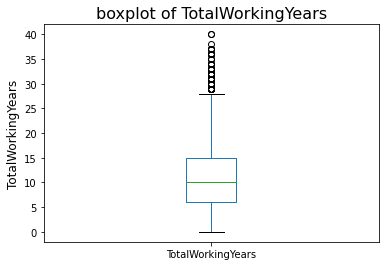

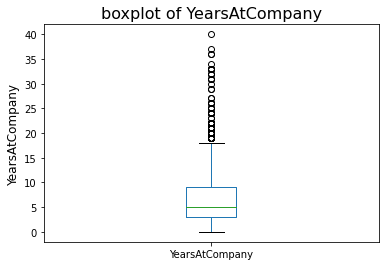

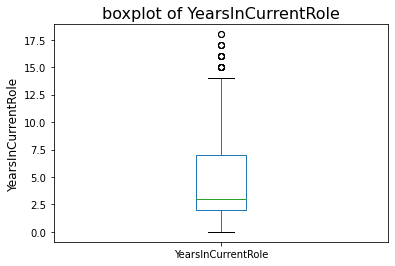

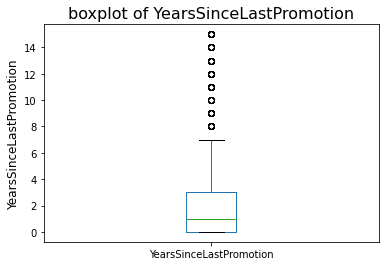

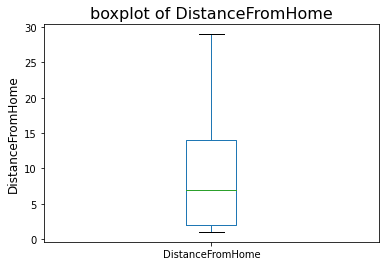

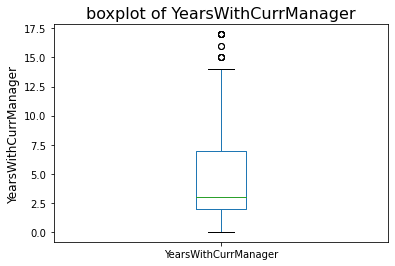

In [10]:
for i in Cont_var:
    data.boxplot(column=i,grid=False)
    plt.ylabel(i,fontsize = 12)
    plt.title( f'boxplot of {i}',fontsize = 16)
    plt.show()

## 2 Bivarient Analysis

In [11]:
cut_age = pd.cut(data["Age"],bins=[18,30,36,43,60],include_lowest=False)
cut_MonthlyIncome = pd.cut(data["MonthlyIncome"],bins=[1000,3000,5000,8500,20000],include_lowest=False)
cut_TotalWorkingYears = pd.cut(data["TotalWorkingYears"],bins=[0,1,2,3,5,6,10,15,40],include_lowest=False)
cut_YearsAtCompany = pd.cut(data["YearsAtCompany"],bins=[0,1,2,3,5,10,15,40],include_lowest=False)
cut_YearsInCurrentRole = pd.cut(data["YearsInCurrentRole"],bins=[0,2,3,7,18],include_lowest=False)
cut_YearsSinceLastPromotion = pd.cut(data["YearsSinceLastPromotion"],bins=[0,1,3,15],include_lowest=False)
cut_DistanceFromHome = pd.cut(data["DistanceFromHome"],bins=[0,5,10,15,20,25,30],include_lowest=False)
cut_YearsWithCurrManager = pd.cut(data["YearsWithCurrManager"],bins=[0,2,3,7,17],include_lowest=False)

list1 = ['BusinessTravel','Department','EducationField','EnvironmentSatisfaction',
         'Gender','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus',
         'OverTime','WorkLifeBalance',
         ]

### 1 Attrition rate

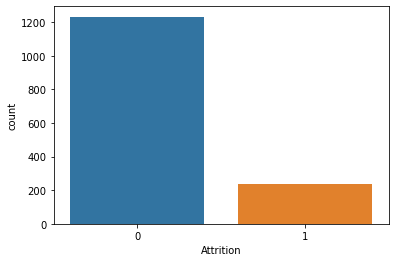

In [12]:
# the attrition in the organisation
sns.countplot(x='Attrition', data = data)
plt.show()

The Attrition rate is nearly 1:6 of the total population

### 2 Attrition based on categorical variables

------------ BUSINESSTRAVEL ------------------
Attrition            0    1
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156
 
Attrition                 0         1
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569


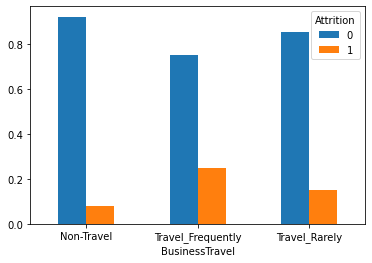

 
------------ DEPARTMENT ------------------
Attrition                 0    1
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92
 
Attrition                      0         1
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278


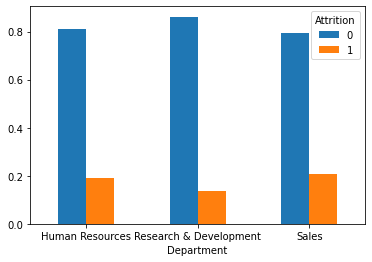

 
------------ EDUCATIONFIELD ------------------
Attrition           0   1
EducationField           
Human Resources    20   7
Life Sciences     517  89
Marketing         124  35
Medical           401  63
Other              71  11
Technical Degree  100  32
 
Attrition                0         1
EducationField                      
Human Resources   0.740741  0.259259
Life Sciences     0.853135  0.146865
Marketing         0.779874  0.220126
Medical           0.864224  0.135776
Other             0.865854  0.134146
Technical Degree  0.757576  0.242424


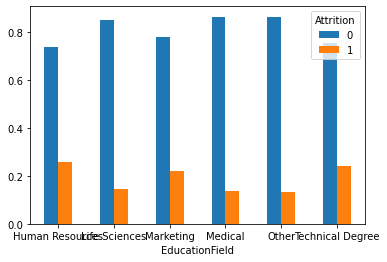

 
------------ ENVIRONMENTSATISFACTION ------------------
Attrition                  0   1
EnvironmentSatisfaction         
1                        212  72
2                        244  43
3                        391  62
4                        386  60
 
Attrition                       0         1
EnvironmentSatisfaction                    
1                        0.746479  0.253521
2                        0.850174  0.149826
3                        0.863135  0.136865
4                        0.865471  0.134529


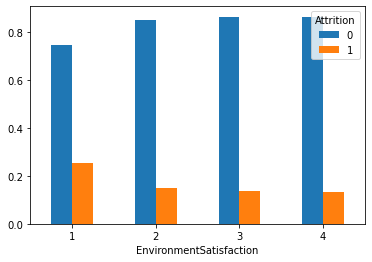

 
------------ GENDER ------------------
Attrition    0    1
Gender             
Female     501   87
Male       732  150
 
Attrition         0         1
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068


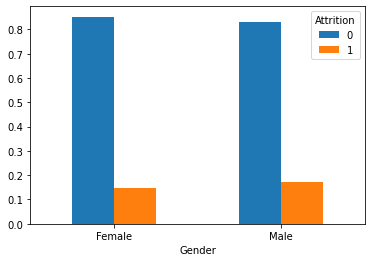

 
------------ JOBINVOLVEMENT ------------------
Attrition         0    1
JobInvolvement          
1                55   28
2               304   71
3               743  125
4               131   13
 
Attrition              0         1
JobInvolvement                    
1               0.662651  0.337349
2               0.810667  0.189333
3               0.855991  0.144009
4               0.909722  0.090278


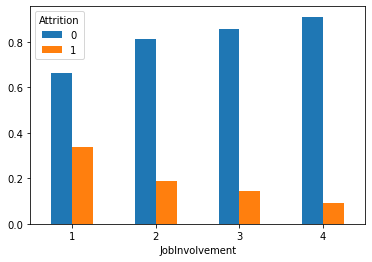

 
------------ JOBLEVEL ------------------
Attrition    0    1
JobLevel           
1          400  143
2          482   52
3          186   32
4          101    5
5           64    5
 
Attrition         0         1
JobLevel                     
1          0.736648  0.263352
2          0.902622  0.097378
3          0.853211  0.146789
4          0.952830  0.047170
5          0.927536  0.072464


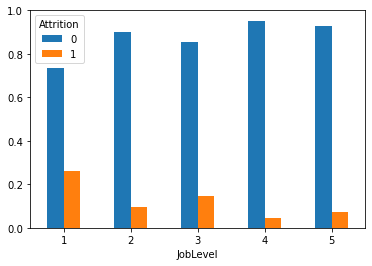

 
------------ JOBSATISFACTION ------------------
Attrition          0   1
JobSatisfaction         
1                223  66
2                234  46
3                369  73
4                407  52
 
Attrition               0         1
JobSatisfaction                    
1                0.771626  0.228374
2                0.835714  0.164286
3                0.834842  0.165158
4                0.886710  0.113290


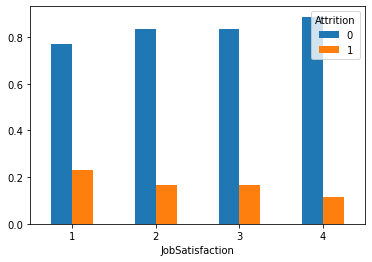

 
------------ MARITALSTATUS ------------------
Attrition        0    1
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120
 
Attrition             0         1
MaritalStatus                    
Divorced       0.899083  0.100917
Married        0.875186  0.124814
Single         0.744681  0.255319


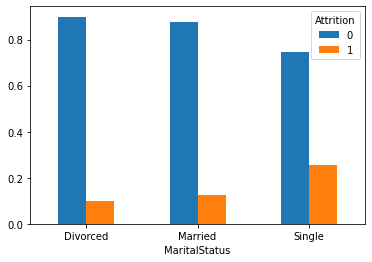

 
------------ OVERTIME ------------------
Attrition    0    1
OverTime           
No         944  110
Yes        289  127
 
Attrition         0         1
OverTime                     
No         0.895636  0.104364
Yes        0.694712  0.305288


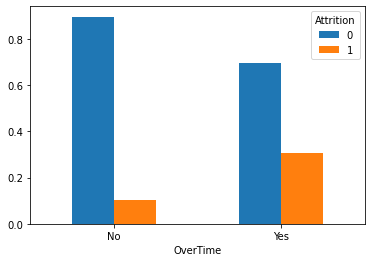

 
------------ WORKLIFEBALANCE ------------------
Attrition          0    1
WorkLifeBalance          
1                 55   25
2                286   58
3                766  127
4                126   27
 
Attrition               0         1
WorkLifeBalance                    
1                0.687500  0.312500
2                0.831395  0.168605
3                0.857783  0.142217
4                0.823529  0.176471


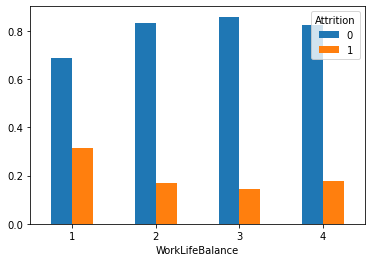

In [13]:
for cvar in list1:
    if cvar == 'Attrition':
        continue
    print('------------',cvar.upper(),'------------------')
    tab = pd.crosstab(data[cvar],columns=data.Attrition)
    print(tab)
    print(' ')
    rowtotal = tab.sum(axis =1)
    tab2 = tab.div(rowtotal,axis=0)
    print(tab2)
    tab2.plot.bar(rot=0)
    plt.show()
    print(' ')

### 3 Attrition based on Age

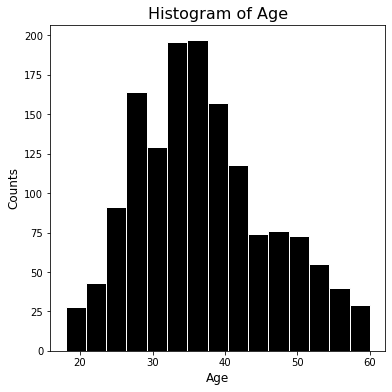

In [14]:
data.hist(column='Age',grid=False,figsize=(6,6),color= 'black',edgecolor='white',bins=15)

plt.xlabel('Age',fontsize = 12)

plt.ylabel('Counts',fontsize = 12)
plt.title( 'Histogram of Age',fontsize = 16)
plt.show()

Our analysis shows that more than half of the Employees has an age between 25-45

In [15]:
# Categorization done with raise in number multiplier of 2 from 18 and from 30 the raise is constant 10
cut_Age = pd.cut(data["Age"],bins=[18,20,24,30,40,50,60],include_lowest=False)
data.groupby(cut_Age)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
Age,,
"(18, 20]",0.400000,0.600000
"(20, 24]",0.681159,0.318841
"(24, 30]",0.785467,0.214533
"(30, 40]",0.862682,0.137318
"(40, 50]",0.894410,0.105590
"(50, 60]",0.874126,0.125874


Our analysis shows that very younger employees tend more towards attrittion

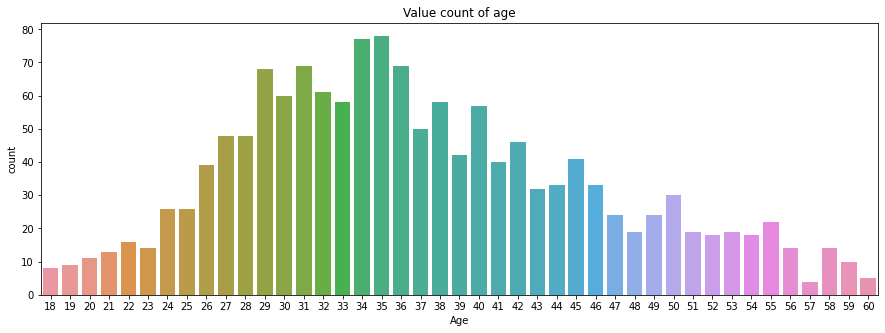

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='Age', data = data)
plt.title('Value count of age')
plt.show()

In [17]:
data[['Age']].describe()

,Age
count,1470.000000
mean,36.923810
std,9.135373
min,18.000000
25%,30.000000
50%,36.000000
75%,43.000000
max,60.000000


our analysis shows that 35 is the most common age

In [18]:
# the bins has been created by increment of 25% of the variables from the minmum to maximum
cut_age = pd.cut(data["Age"],bins=[18,30,36,43,60],include_lowest=False)
data.groupby(cut_age)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
Age,,
"(18, 30]",0.746032,0.253968
"(30, 36]",0.839806,0.160194
"(36, 43]",0.910769,0.089231
"(43, 60]",0.878963,0.121037


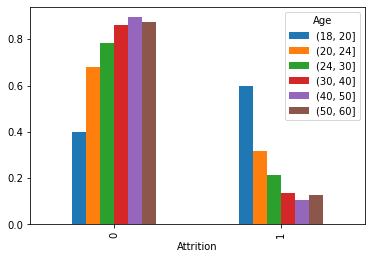

Age        (18, 20]  (20, 24]  (24, 30]  (30, 40]  (40, 50]  (50, 60]
Attrition                                                            
0               0.4  0.681159  0.785467  0.862682   0.89441  0.874126
1               0.6  0.318841  0.214533  0.137318   0.10559  0.125874


In [19]:
# the bins has been created by increment of 25% of the variables from the minmum to maximum
cut_age = pd.cut(data["Age"],bins=[18,30,36,43,60],include_lowest=False)

Table12 = pd.crosstab(index=data.Attrition,columns=cut_Age)
coltotal12 = Table12.sum(axis=0)
tb12 = Table12.div(coltotal12,axis = 1)
tb12.plot.bar(rot=90)
plt.show()
print(tb12)


Our analysis shows that the younger employees tend more towards attrition.

### 4 Attrition based on Monthly Income

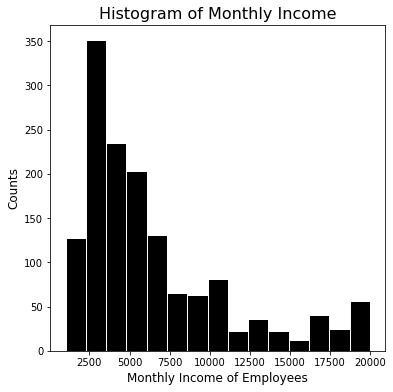

In [20]:
data.hist(column='MonthlyIncome',grid=False,figsize=(6,6),color= 'black',edgecolor='white',bins=15)

plt.xlabel('Monthly Income of Employees',fontsize = 12)

plt.ylabel('Counts',fontsize = 12)
plt.title( 'Histogram of Monthly Income',fontsize = 16)
plt.show()

In [21]:
# Categorization on the basis of the range of 5000 from lowest monthly salary
cut_MonthlyIncome = pd.cut(data["MonthlyIncome"],bins=[1000,6000,11000,16000,21000],include_lowest=False)
data.groupby(cut_MonthlyIncome)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
MonthlyIncome,,
"(1000, 6000]",0.804158,0.195842
"(6000, 11000]",0.865103,0.134897
"(11000, 16000]",0.921348,0.078652
"(16000, 21000]",0.960317,0.039683


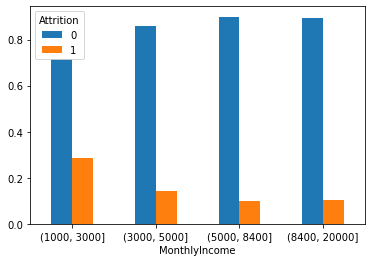

Attrition             0         1
MonthlyIncome                    
(1000, 3000]   0.713924  0.286076
(3000, 5000]   0.858757  0.141243
(5000, 8400]   0.899160  0.100840
(8400, 20000]  0.895604  0.104396


In [22]:
cut_MonthlyIncome = pd.cut(data["MonthlyIncome"],bins=[1000,3000,5000,8400,20000],include_lowest=False)

Table11 = pd.crosstab(cut_MonthlyIncome,columns=data.Attrition)
coltotal11 = Table11.sum(axis=1)
tb11 = Table11.div(coltotal11,axis = 0)
tb11.plot.bar(rot=0)
plt.show()
print(tb11)


From the above analysis the attrition rate increases with the decrease in salary

The above analysis shows that the large number of the employees are paid very low salary

In [23]:
data[['MonthlyIncome']].describe()

,MonthlyIncome
count,1470.000000
mean,6502.931293
std,4707.956783
min,1009.000000
25%,2911.000000
50%,4919.000000
75%,8379.000000
max,19999.000000


From above analysis we can say that the maximum salary is 19999.00 But curency unknown factor

In [24]:
# Categorization on the basis of the range of 25% from lowest to heighest monthly income
cut_MonthlyIncome = pd.cut(data["MonthlyIncome"],bins=[1000,3000,5000,8500,20000],include_lowest=False)
data.groupby(cut_MonthlyIncome)["Attrition"].value_counts(normalize=True).unstack()


Attrition,0,1
MonthlyIncome,,
"(1000, 3000]",0.713924,0.286076
"(3000, 5000]",0.858757,0.141243
"(5000, 8500]",0.897790,0.102210
"(8500, 20000]",0.896936,0.103064


From the above analysis the attrition rate increases with the decrease in salary

### 5 Attrition based on TotalWorkingYears

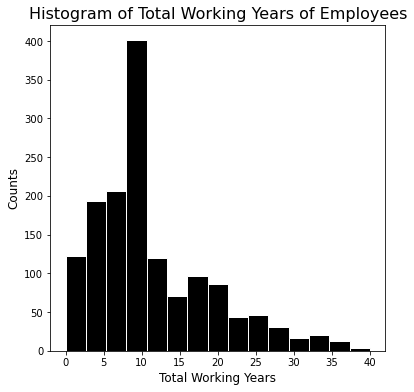

In [25]:
data.hist(column='TotalWorkingYears',grid=False,figsize=(6,6),color= 'black',edgecolor='white',bins=15)

plt.xlabel('Total Working Years',fontsize = 12)

plt.ylabel('Counts',fontsize = 12)
plt.title( 'Histogram of Total Working Years of Employees',fontsize = 16)
plt.show()

In [26]:
# Categorization on the basis of the range of 10 from Zero with some initial values 
cut_TotalWorkingYears = pd.cut(data["TotalWorkingYears"],bins=[0,1,2,3,5,10,20,30,40],include_lowest=False)
data.groupby(cut_TotalWorkingYears)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
TotalWorkingYears,,
"(0, 1]",0.506173,0.493827
"(1, 2]",0.709677,0.290323
"(2, 3]",0.785714,0.214286
"(3, 5]",0.814570,0.185430
"(5, 10]",0.850082,0.149918
"(10, 20]",0.885294,0.114706
"(20, 30]",0.931677,0.068323
"(30, 40]",0.891304,0.108696


I have taken few intial values becuase more Employees tend to attrition for a better opportunities and hike in salary

In [27]:
data[['TotalWorkingYears']].describe()

,TotalWorkingYears
count,1470.000000
mean,11.279592
std,7.780782
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,40.000000


In [28]:
# Categorization on the basis of the range of 25% from lowest to heighest monthly income with some initial values
cut_TotalWorkingYears = pd.cut(data["TotalWorkingYears"],bins=[0,1,2,3,5,6,10,15,40],include_lowest=False)
data.groupby(cut_TotalWorkingYears)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
TotalWorkingYears,,
"(0, 1]",0.506173,0.493827
"(1, 2]",0.709677,0.290323
"(2, 3]",0.785714,0.214286
"(3, 5]",0.814570,0.185430
"(5, 6]",0.824000,0.176000
"(6, 10]",0.856846,0.143154
"(10, 15]",0.874346,0.125654
"(15, 40]",0.912921,0.087079


Above analysis shows that Attrition rate increases with low work experience

### 6 Attrition based on Years at the Company

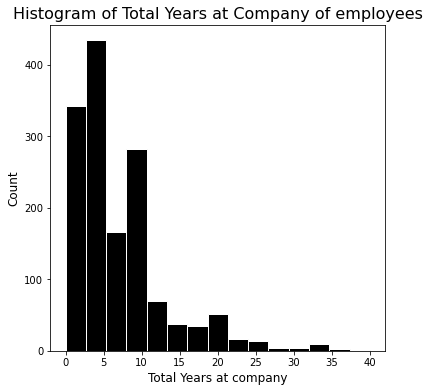

In [29]:
data.hist(column='YearsAtCompany',grid=False,figsize=(6,6),color= 'black',edgecolor='white',bins=15)

plt.xlabel('Total Years at company',fontsize = 12)

plt.ylabel('Count',fontsize = 12)
plt.title( 'Histogram of Total Years at Company of employees',fontsize = 16)
plt.show()

In [30]:
# Categorization on the basis of the range of 10 from lowest Zero with some intial values
cut_YearsAtCompany = pd.cut(data["YearsAtCompany"],bins=[0,1,2,3,5,10,20,30,50],include_lowest=False)
data.groupby(cut_YearsAtCompany)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
YearsAtCompany,,
"(0, 1]",0.654971,0.345029
"(1, 2]",0.787402,0.212598
"(2, 3]",0.843750,0.156250
"(3, 5]",0.869281,0.130719
"(5, 10]",0.877232,0.122768
"(10, 20]",0.933333,0.066667
"(20, 30]",0.920000,0.080000
"(30, 50]",0.750000,0.250000


In [31]:
data[['TotalWorkingYears']].describe()

,TotalWorkingYears
count,1470.000000
mean,11.279592
std,7.780782
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,40.000000


In [32]:
# Categorization on the basis of the range of 25% from lowest to heighest monthly income with some intial values
cut_YearsAtCompany = pd.cut(data["YearsAtCompany"],bins=[0,1,2,3,5,10,15,40],include_lowest=False)
data.groupby(cut_YearsAtCompany)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
YearsAtCompany,,
"(0, 1]",0.654971,0.345029
"(1, 2]",0.787402,0.212598
"(2, 3]",0.843750,0.156250
"(3, 5]",0.869281,0.130719
"(5, 10]",0.877232,0.122768
"(10, 15]",0.935185,0.064815
"(15, 40]",0.905797,0.094203


Above analysis shows that the Attrition rate increases with the decrease in the total working years at the company

### 7 Attrition based on Years in the Current Role

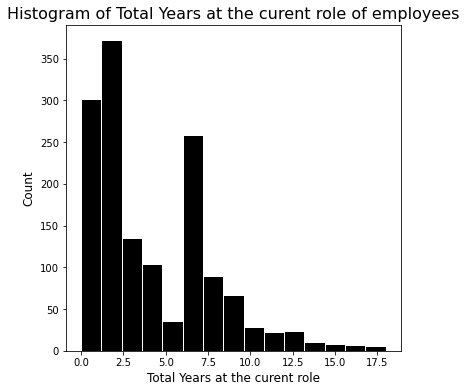

In [33]:
data.hist(column='YearsInCurrentRole',grid=False,figsize=(6,6),color= 'black',edgecolor='white',bins=15)

plt.xlabel('Total Years at the curent role',fontsize = 12)

plt.ylabel('Count',fontsize = 12)
plt.title( 'Histogram of Total Years at the curent role of employees',fontsize = 16)
plt.show()

In [34]:
# Categorization on the basis of the range of 2 from zero to maximum value
cut_YearsInCurrentRole = pd.cut(data["YearsInCurrentRole"],bins=[0,2,4,6,8,10,12,14,16,18],include_lowest=False)
data.groupby(cut_YearsInCurrentRole)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
YearsInCurrentRole,,
"(0, 2]",0.815851,0.184149
"(2, 4]",0.870293,0.129707
"(4, 6]",0.958904,0.041096
"(6, 8]",0.877814,0.122186
"(8, 10]",0.916667,0.083333
"(10, 12]",0.968750,0.031250
"(12, 14]",0.920000,0.080000
"(14, 16]",0.866667,0.133333
"(16, 18]",1.000000,NaN


In [35]:
data[['YearsInCurrentRole']].describe()

,YearsInCurrentRole
count,1470.000000
mean,4.229252
std,3.623137
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,18.000000


In [36]:
# Categorization on the basis of the range of 25% from lowest to heighest YearsInCurrentRole
cut_YearsInCurrentRole = pd.cut(data["YearsInCurrentRole"],bins=[0,2,3,7,18],include_lowest=False)
data.groupby(cut_YearsInCurrentRole)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
YearsInCurrentRole,,
"(0, 2]",0.815851,0.184149
"(2, 3]",0.881481,0.118519
"(3, 7]",0.877193,0.122807
"(7, 18]",0.923954,0.076046


Above analysis shows that the attrition is high in employees with lowest time period in there current role

### 8 Attrition based on Years Since Last Promotion

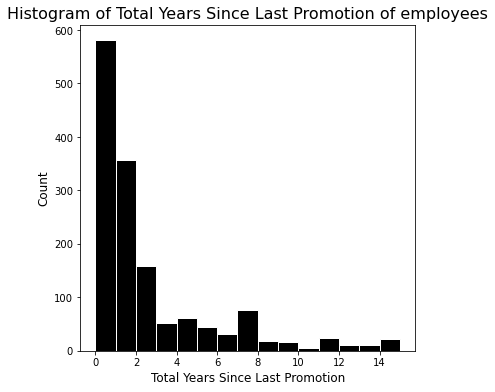

In [37]:
data.hist(column='YearsSinceLastPromotion',grid=False,figsize=(6,6),color= 'black',edgecolor='white',bins=15)

plt.xlabel('Total Years Since Last Promotion',fontsize = 12)

plt.ylabel('Count',fontsize = 12)
plt.title( 'Histogram of Total Years Since Last Promotion of employees',fontsize = 16)
plt.show()

In [38]:
# Categorization on the basis of the range of 2 from zero to maximum value
cut_YearsSinceLastPromotion = pd.cut(data["YearsSinceLastPromotion"],bins=[0,2,4,6,8,10,12,14,16],include_lowest=False)
data.groupby(cut_YearsSinceLastPromotion)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
YearsSinceLastPromotion,,
"(0, 2]",0.852713,0.147287
"(2, 4]",0.876106,0.123894
"(4, 6]",0.896104,0.103896
"(6, 8]",0.829787,0.170213
"(8, 10]",0.782609,0.217391
"(10, 12]",0.941176,0.058824
"(12, 14]",0.842105,0.157895
"(14, 16]",0.769231,0.230769


Above analysis shows that there is no particular corelation between attrition and time period between Promotion

In [39]:
data[['YearsSinceLastPromotion']].describe()

,YearsSinceLastPromotion
count,1470.000000
mean,2.187755
std,3.222430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,15.000000


In [40]:
# Categorization on the basis of the range of 25% from lowest to heighest YearsInCurrentRole
cut_YearsSinceLastPromotion = pd.cut(data["YearsSinceLastPromotion"],bins=[0,1,3,15],include_lowest=False)
data.groupby(cut_YearsSinceLastPromotion)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
YearsSinceLastPromotion,,
"(0, 1]",0.862745,0.137255
"(1, 3]",0.829384,0.170616
"(3, 15]",0.869159,0.130841


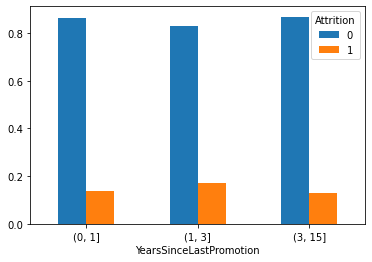

Attrition                       0         1
YearsSinceLastPromotion                    
(0, 1]                   0.862745  0.137255
(1, 3]                   0.829384  0.170616
(3, 15]                  0.869159  0.130841


In [41]:
cut_YearsSinceLastPromotion = pd.cut(data["YearsSinceLastPromotion"],bins=[0,1,3,15],include_lowest=False)

Table11 = pd.crosstab(cut_YearsSinceLastPromotion,columns=data.Attrition)
coltotal11 = Table11.sum(axis=1)
tb11 = Table11.div(coltotal11,axis = 0)
tb11.plot.bar(rot=0)
plt.show()
print(tb11)


Above analysis shows that the attrition is more in between time period of 1-3 from years since last promotion and by this we can conclude that the employees are more volatile in terms of attrition if they don't get promoted

### 9 Attrition based on years with current manager

In [42]:
data[['YearsWithCurrManager']].describe()

,YearsWithCurrManager
count,1470.000000
mean,4.123129
std,3.568136
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,17.000000


In [43]:
# Categorization on the basis of the range of 25% from lowest to heighest YearsInCurrentRole
cut_YearsWithCurrManager = pd.cut(data["YearsWithCurrManager"],bins=[0,2,3,7,17],include_lowest=False)
data.groupby(cut_YearsWithCurrManager)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
YearsWithCurrManager,,
"(0, 2]",0.854762,0.145238
"(2, 3]",0.866197,0.133803
"(3, 7]",0.866310,0.133690
"(7, 17]",0.918819,0.081181


Above analysis shows that there is not much of a relation between attrition and YearsWithCurrManager

### 10 Attrition based on Distance From Home

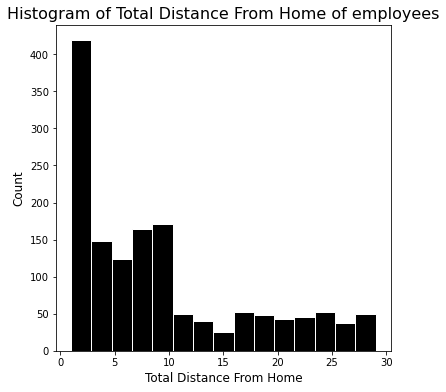

In [44]:
data.hist(column='DistanceFromHome',grid=False,figsize=(6,6),color= 'black',edgecolor='white',bins=15)

plt.xlabel('Total Distance From Home',fontsize = 12)

plt.ylabel('Count',fontsize = 12)
plt.title( 'Histogram of Total Distance From Home of employees',fontsize = 16)
plt.show()

In [45]:
# Categorization on the basis of the range of 5 from zero to maximum value
cut_DistanceFromHome = pd.cut(data["DistanceFromHome"],bins=[0,5,10,15,20,25,30],include_lowest=False)
data.groupby(cut_DistanceFromHome)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
DistanceFromHome,,
"(0, 5]",0.862342,0.137658
"(5, 10]",0.855330,0.144670
"(10, 15]",0.782609,0.217391
"(15, 20]",0.816000,0.184000
"(20, 25]",0.726496,0.273504
"(25, 30]",0.850575,0.149425


Above analysis shows that there is no particular corelation between attrition and distance between home and workplace

In [46]:
data[['DistanceFromHome']].describe()

,DistanceFromHome
count,1470.000000
mean,9.192517
std,8.106864
min,1.000000
25%,2.000000
50%,7.000000
75%,14.000000
max,29.000000


In [47]:
# Categorization on the basis of the range of 25% from lowest to heighest YearsInCurrentRole
cut_DistanceFromHome = pd.cut(data["DistanceFromHome"],bins=[1,2,7,14,29],include_lowest=False)
data.groupby(cut_DistanceFromHome)["Attrition"].value_counts(normalize=True).unstack()

Attrition,0,1
DistanceFromHome,,
"(1, 2]",0.867299,0.132701
"(2, 7]",0.856742,0.143258
"(7, 14]",0.826471,0.173529
"(14, 29]",0.794366,0.205634


Above analysis shows that there is no particular corelation between attrition and distance between home and workplace

## 3 Corelation Between the variables

In [48]:
corr = data.corr()
corr.style.background_gradient()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
Age,1.000000,-0.159205,0.010146,0.029820,0.509604,-0.004892,0.497855,0.680381,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.001686
Attrition,-0.159205,1.000000,-0.103369,-0.130016,-0.169105,-0.103481,-0.159840,-0.171063,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,0.077924
EnvironmentSatisfaction,0.010146,-0.103369,1.000000,-0.008278,0.001212,-0.006784,-0.006259,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.016075
JobInvolvement,0.029820,-0.130016,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,-0.005533,-0.014617,-0.021355,0.008717,-0.024184,0.025976,0.008783
JobLevel,0.509604,-0.169105,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.782208,0.037818,0.534739,0.389447,0.353885,0.375281,0.005303
JobSatisfaction,-0.004892,-0.103481,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.020185,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.003669
MonthlyIncome,0.497855,-0.159840,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.772893,0.030683,0.514285,0.363818,0.344978,0.344079,-0.017014
TotalWorkingYears,0.680381,-0.171063,-0.002693,-0.005533,0.782208,-0.020185,0.772893,1.000000,0.001008,0.628133,0.460365,0.404858,0.459188,0.004628
WorkLifeBalance,-0.021490,-0.063939,0.027627,-0.014617,0.037818,-0.019459,0.030683,0.001008,1.000000,0.012089,0.049856,0.008941,0.002759,-0.026556
YearsAtCompany,0.311309,-0.134392,0.001458,-0.021355,0.534739,-0.003803,0.514285,0.628133,0.012089,1.000000,0.758754,0.618409,0.769212,0.009508


**Observation**

* We see a high degree of correlation between 
  1. Job Level Score and Monthly Income
  2. Job Level and Total Working years
  3. Monthly income  and Total Working Years 



In [49]:
# Filter the highest correlation pairs and sort in descending order
stacked_data = data.corr().stack().sort_values(ascending=False)
stacked_data[(stacked_data > 0.7) & (stacked_data < 1)]

JobLevel              MonthlyIncome           0.950300
MonthlyIncome         JobLevel                0.950300
TotalWorkingYears     JobLevel                0.782208
JobLevel              TotalWorkingYears       0.782208
TotalWorkingYears     MonthlyIncome           0.772893
MonthlyIncome         TotalWorkingYears       0.772893
YearsWithCurrManager  YearsAtCompany          0.769212
YearsAtCompany        YearsWithCurrManager    0.769212
YearsInCurrentRole    YearsAtCompany          0.758754
YearsAtCompany        YearsInCurrentRole      0.758754
YearsWithCurrManager  YearsInCurrentRole      0.714365
YearsInCurrentRole    YearsWithCurrManager    0.714365
dtype: float64

# Analysis of report

Age is a contributing factor in the attrition rate. Younger employees under 30 have higher attrition rate. 

Higher employee travel frequency is also contributing to the attrition rate.
Overtime is one of the main factors contributing to attrition.

HR Department followed by Sales shows more attrition.

Lower environment satisfaction combined with lower job involvement contributes significantly to attrition rates.

The employees are more volatile in terms of attrition if they don't get promoted.

Lower monthly income contributes to attrition rate slightly.


# Decision Tree Module (Classifier)

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# for importing tree
from sklearn import tree

In [65]:
# Checking for feature with non-numerical values:

from pandas.api.types import is_numeric_dtype
l1=[]
company_col = list(data.columns)
for col in company_col:
    if is_numeric_dtype(data[col])== False:
        l1.append(col)
l1        

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'MaritalStatus',
 'OverTime']

In [66]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [67]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [68]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [69]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [70]:
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [71]:
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

In [72]:
data['Gender'].value_counts()

0    882
1    588
Name: Gender, dtype: int64

In [73]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [74]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [75]:
data['OverTime'] = data['OverTime'].apply(lambda x: 0 if x == 'Yes' else 1)

In [76]:
l1.remove('Gender')
l1.remove('OverTime')
l1

['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus']

In [77]:
# One Hot Encoding for Buisness_Travel

business_travel = pd.get_dummies(data['BusinessTravel'],prefix='Business')
data = pd.concat([data,business_travel],axis=1)
data = data.drop('BusinessTravel',axis=1)

In [78]:
# One Hot Encoding for Department

buisness_travel = pd.get_dummies(data['Department'],prefix='Department')
data = pd.concat([data,buisness_travel],axis=1)
data = data.drop('Department',axis=1)

In [79]:
# One Hot Encoding for EducationField

buisness_travel = pd.get_dummies(data['EducationField'],prefix='EducationField')
data = pd.concat([data,buisness_travel],axis=1)
data = data.drop('EducationField',axis=1)

In [80]:
# One Hot Encoding for MaritalStatus

buisness_travel = pd.get_dummies(data['MaritalStatus'],prefix='MaritalStatus')
data = pd.concat([data,buisness_travel],axis=1)
data = data.drop('MaritalStatus',axis=1)

In [81]:
data

,Age,Attrition,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,TotalWorkingYears,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1,3,2,4,5993,0,8,...,1,0,1,0,0,0,0,0,0,1
1,49,0,3,0,2,2,2,5130,1,10,...,0,0,1,0,0,0,0,0,1,0
2,37,1,4,0,2,1,3,2090,0,7,...,0,0,0,0,0,1,0,0,0,1
3,33,0,4,1,3,1,3,2909,0,8,...,0,0,1,0,0,0,0,0,1,0
4,27,0,1,0,3,1,2,3468,1,6,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,3,0,4,2,4,2571,1,17,...,0,0,0,0,1,0,0,0,1,0
1466,39,0,4,0,2,3,1,9991,1,9,...,0,0,0,0,1,0,0,0,1,0
1467,27,0,2,0,4,2,2,6142,0,6,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,4,0,2,2,2,5390,1,17,...,1,0,0,0,1,0,0,0,1,0


### Decision Tree Module

### 1 Predictor and target

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_absolute_percentage_error, mean_squared_error, confusion_matrix,precision_score 
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [83]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [84]:
x = data.drop('Attrition',axis=1)
y = data['Attrition']

In [85]:
x.shape,y.shape

((1470, 30), (1470,))

In [86]:
smk = SMOTETomek()
x_res,y_res = smk.fit_resample(x,y)
x_res.shape,y_res.shape

((2244, 30), (2244,))

In [87]:
x_res.head()

,Age,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,49,3,0,2,2,2,5130,1,10,3,...,0,0,1,0,0,0,0,0,1,0
1,37,4,0,2,1,3,2090,0,7,3,...,0,0,0,0,0,1,0,0,0,1
2,33,4,1,3,1,3,2909,0,8,3,...,0,0,1,0,0,0,0,0,1,0
3,27,1,0,3,1,2,3468,1,6,3,...,0,0,0,0,1,0,0,0,1,0
4,32,4,0,3,1,4,3068,1,8,2,...,0,0,1,0,0,0,0,0,0,1


### 2 Train - validation - Test Split

In [88]:
# for test-train split
from sklearn.model_selection import train_test_split

In [89]:
#Train - Test split
x_res_train,x_res_test,y_res_train,y_res_test = train_test_split(x_res,y_res,test_size=0.2,random_state=3)

### 3 Fitting a Regression Tree And Prediction

In [90]:
# for fitting Clasifier tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [91]:
depth = np.arange(1,40)
mean_f1 = []

for k in depth:
    dtm = DecisionTreeClassifier(max_depth=k, criterion='gini', random_state=3)
    dtr = cross_validate(estimator=dtm, X=x_res_train,  y=y_res_train, cv=5, scoring='f1')
    mean_f1.append(np.mean(dtr['test_score']))

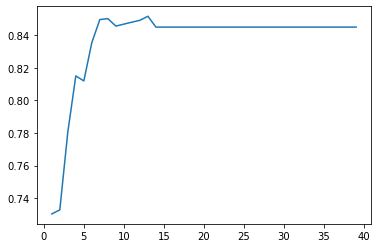

In [92]:
plt.plot(depth,np.array(mean_f1))
plt.show()

In [93]:
depth = 6

In [95]:
clf_tree = DecisionTreeClassifier(max_depth=6,min_samples_leaf=5)   
clf_tree.fit(x_res_train,y_res_train)
y_pred= clf_tree.predict(x_res_test)
f1_score(y_res_test, y_pred)*100  #f1 score

81.33333333333333

### 4 Plotting a Regression Tree

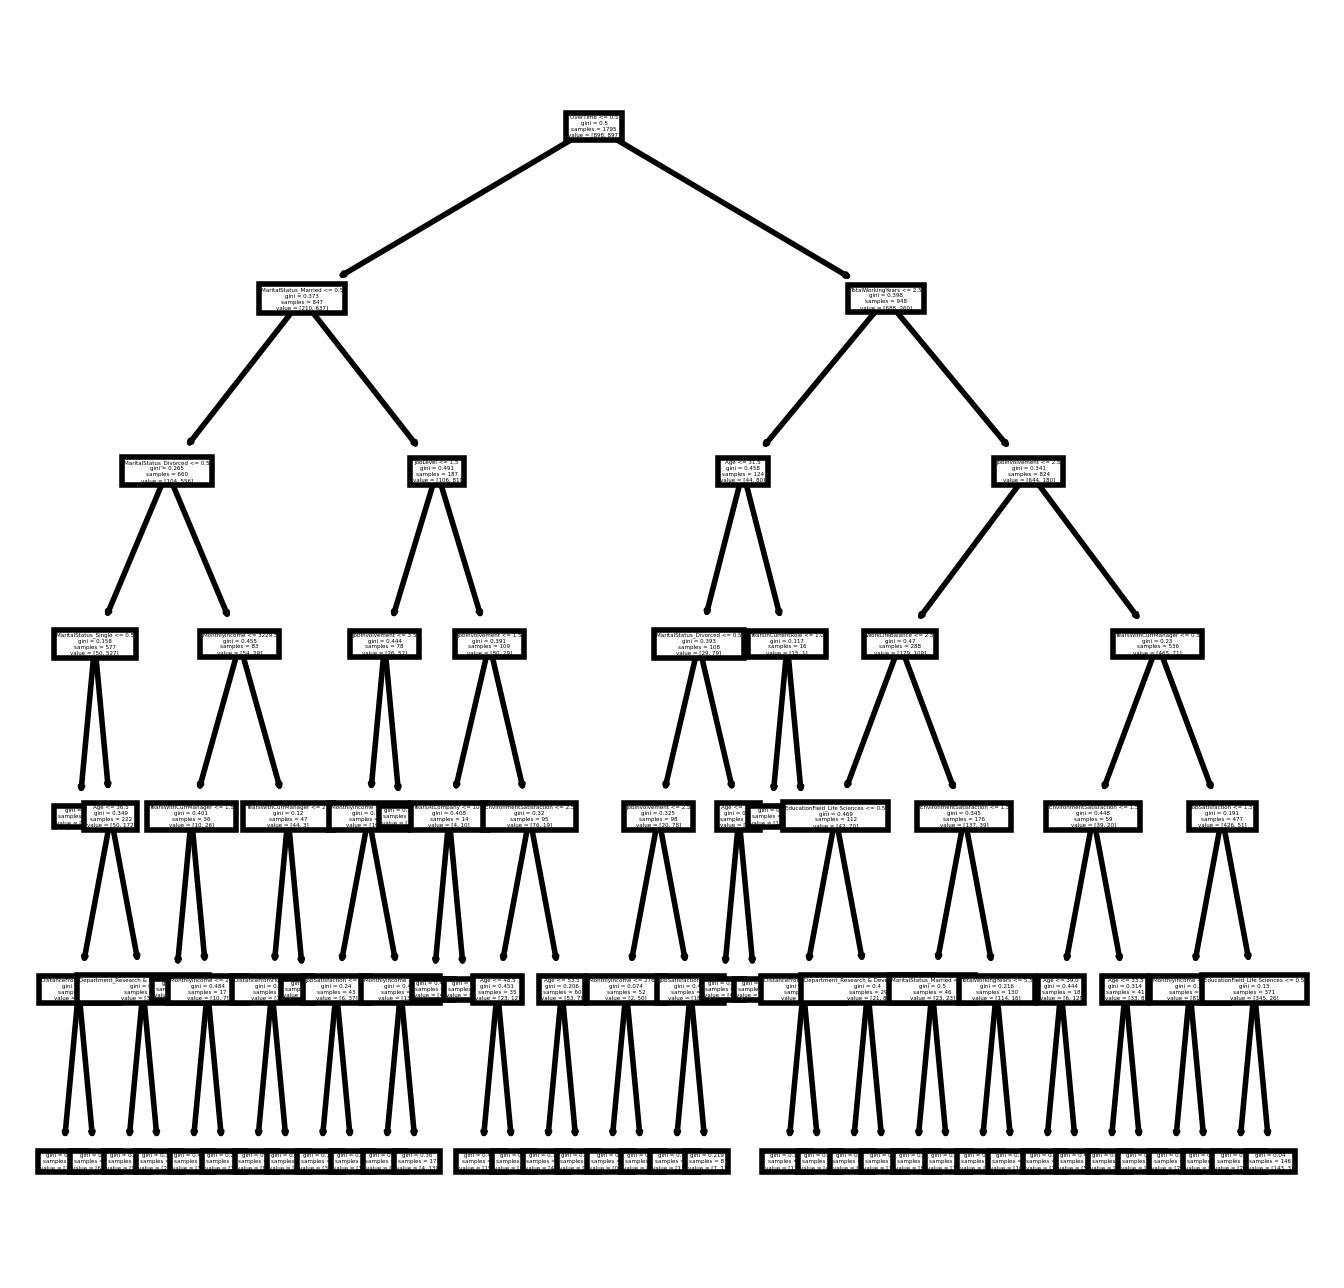

In [96]:
# for importing tree
from sklearn import tree
fig,axes = plt.subplots(figsize=(4,4),dpi=400)
tree.plot_tree(clf_tree,feature_names=list(x),filled=False)
plt.show()

### 5 Model Performance checks

In [97]:
print(f"Accuracy : {accuracy_score(y_res_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_res_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_res_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_res_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_res_test, y_pred))

Accuracy : 81.29175946547885%
recall_score : 81.33333333333333%
precision_score : 81.33333333333333%
f1_score : 81.33333333333333%
confusion_matrix :
[[182  42]
 [ 42 183]]


In [98]:
# Predicted        Not leaving the insurance company   leaving the insurance company
# Actual
# Not leaving the company  182  -TN           42   -FP
# leaving the company      42   -FN           183    -TP
confusion = confusion_matrix(y_res_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Calculate the sensitivity
TP/(TP+FN)

# Calculate the specificity
TN/(TN+FP)

from sklearn.metrics import classification_report

print(f"{classification_report(y_res_test, y_pred, target_names=['Not leaving the company','leaving the company'])}")

                         precision    recall  f1-score   support

Not leaving the company       0.81      0.81      0.81       224
    leaving the company       0.81      0.81      0.81       225

               accuracy                           0.81       449
              macro avg       0.81      0.81      0.81       449
           weighted avg       0.81      0.81      0.81       449



In [100]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc,plot_confusion_matrix, plot_roc_curve)
from sklearn.metrics import roc_curve

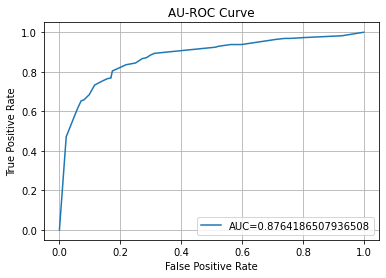

AUC SCORE :0.8764186507936508


In [101]:

# AUC- ROC

y_pred_proba = clf_tree.predict_proba(x_res_test)[::,1]
fpr, tpr, label = roc_curve(y_res_test,  y_pred_proba)
auc = roc_auc_score(y_res_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()
print(f"AUC SCORE :{auc}" )

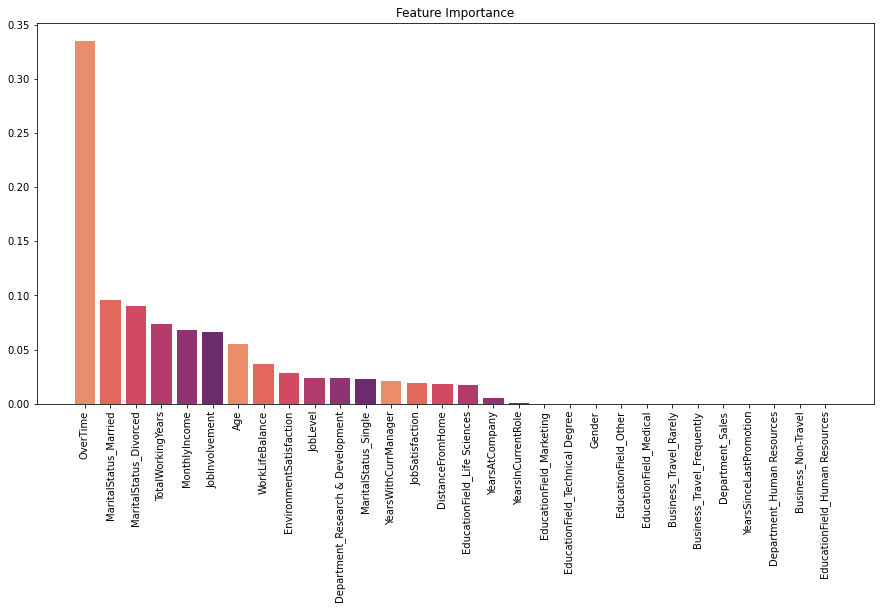

In [102]:
# Feature importance
importances = clf_tree.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [x_res_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(x_res_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(x_res_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

### KNN Module

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_absolute_percentage_error, mean_squared_error, confusion_matrix
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [104]:
data

,Age,Attrition,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,TotalWorkingYears,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1,3,2,4,5993,0,8,...,1,0,1,0,0,0,0,0,0,1
1,49,0,3,0,2,2,2,5130,1,10,...,0,0,1,0,0,0,0,0,1,0
2,37,1,4,0,2,1,3,2090,0,7,...,0,0,0,0,0,1,0,0,0,1
3,33,0,4,1,3,1,3,2909,0,8,...,0,0,1,0,0,0,0,0,1,0
4,27,0,1,0,3,1,2,3468,1,6,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,3,0,4,2,4,2571,1,17,...,0,0,0,0,1,0,0,0,1,0
1466,39,0,4,0,2,3,1,9991,1,9,...,0,0,0,0,1,0,0,0,1,0
1467,27,0,2,0,4,2,2,6142,0,6,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,4,0,2,2,2,5390,1,17,...,1,0,0,0,1,0,0,0,1,0


In [105]:
x = data.drop('Attrition',axis=1)
y = data['Attrition']

In [106]:
smk = SMOTETomek()
x_res,y_res = smk.fit_resample(x,y)
x_res.shape,y_res.shape

((2262, 30), (2262,))

In [107]:
#Train - Test split
x_res_train,x_res_test,y_res_train,y_res_test = train_test_split(x_res,y_res,test_size=0.2,random_state=3)

In [108]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(x_res_train, y_res_train)
y_pred = knn.predict(x_res_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [109]:
depth = np.arange(1,40)
mean_f1 = []

for k in depth:
    knn_model = KNeighborsClassifier(n_neighbors= k, metric='euclidean')
    knn = cross_validate(estimator=knn_model, X=x_res_train,  y=y_res_train, cv=5, scoring='f1')
    mean_f1.append(np.mean(knn['test_score']))
    

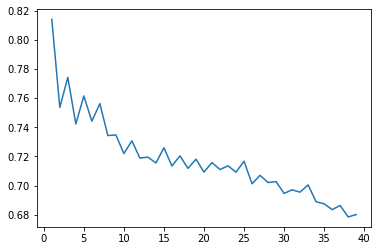

In [110]:
plt.plot(depth,np.array(mean_f1))
plt.show()

In [111]:
# Test
k = 7
knn = KNeighborsClassifier(n_neighbors= k)
knn.fit(x_res_train, y_res_train)
y_pred_knn = knn.predict(x_res_test)
y_pred_knn

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,

In [112]:
print(f"Accuracy : {accuracy_score(y_res_test, y_pred)*100}%")
print(f"recall_score : {recall_score(y_res_test, y_pred)*100}%")
print(f"precision_score : {precision_score(y_res_test, y_pred)*100}%")
print(f"f1_score : {f1_score(y_res_test, y_pred)*100}%")
print(f"confusion_matrix :")
print(confusion_matrix(y_res_test, y_pred))

Accuracy : 82.560706401766%
recall_score : 91.11111111111111%
precision_score : 77.65151515151516%
f1_score : 83.84458077709613%
confusion_matrix :
[[169  59]
 [ 20 205]]


In [113]:
# Predicted        Not leaving the insurance company   leaving the insurance company
# Actual
# Not leaving the company  169  -TN           59     -FP
# leaving the company      20   -FN           205    -TP
confusion = confusion_matrix(y_res_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# Calculate the sensitivity
TP/(TP+FN)

# Calculate the specificity
TN/(TN+FP)

from sklearn.metrics import classification_report

print(f"{classification_report(y_res_test, y_pred, target_names=['Not leaving the company','leaving the company'])}")

                         precision    recall  f1-score   support

Not leaving the company       0.89      0.74      0.81       228
    leaving the company       0.78      0.91      0.84       225

               accuracy                           0.83       453
              macro avg       0.84      0.83      0.82       453
           weighted avg       0.84      0.83      0.82       453



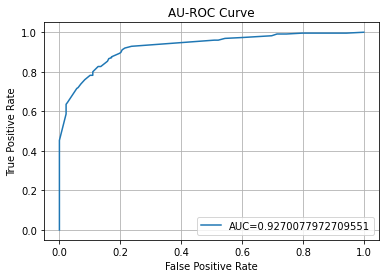

AUC SCORE :0.9270077972709551


In [115]:

# AUC- ROC

y_pred_proba = clf_tree.predict_proba(x_res_test)[::,1]
fpr, tpr, label = roc_curve(y_res_test,  y_pred_proba)
auc = roc_auc_score(y_res_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()
print(f"AUC SCORE :{auc}" )

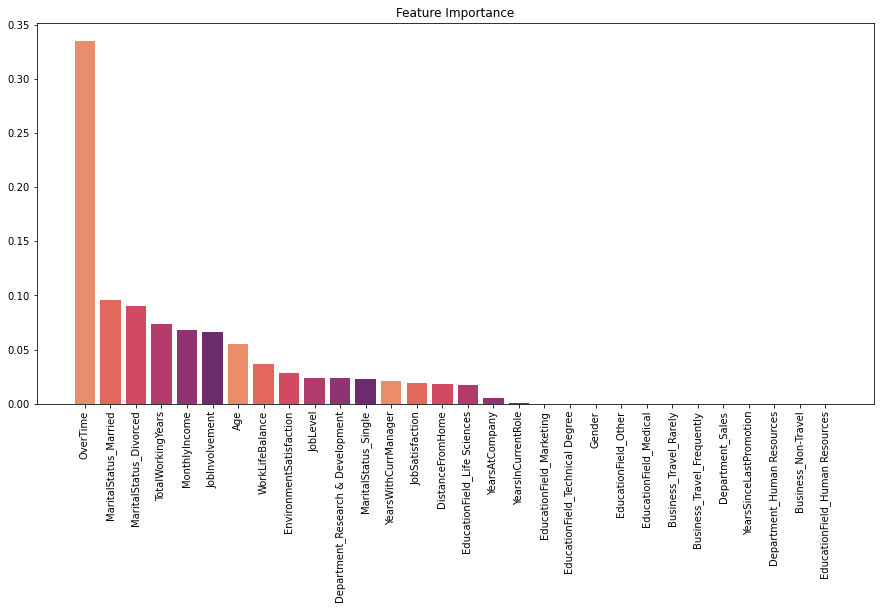

In [116]:
# Feature importance
importances = clf_tree.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [x_res_test.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(x_res_test.shape[1]), importances[indices],color=sns.color_palette("flare")) # Add bars
plt.xticks(range(x_res_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()